# Pima indians diabetes - simple analysis

# EDA

### 768 observations of medical details for Pima indians patients. All patients are women aged 21 or older. Each record has a class value that indicates whether the patient suffered an onset of diabetes within 5 years of when the measurements were taken (1) or not (0).

### Columns description:

1.   Number of times pregnant
2.   Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3.   Diastolic blood pressure (mm Hg)
4.   Triceps skin fold thickness (mm)
5.   2-Hour serum insulin (mu U/ml)
6.   Body mass index (weight in kg/(height in m)^2)
7.   Diabetes pedigree function
8.   Age (years)
9.   Class variable (0 or 1)

##### A good prediction accuracy is 70%-76%

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

C:\Users\suwcz\Miniconda3\envs\science\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
column_names = ['pregnancy', 'plasma_glucose', 'blood_pressure', 'skin_fold_thickness', 'serum_insulin', 
                'body_mass_index', 'pedigree_fun', 'age', 'class']
df = pd.read_csv('pima-indians-diabetes.csv', 
                 skiprows=[0,1,2,3,4,5,6,7,8], header=None, names=column_names)

In [4]:
df['class'] = df['class'].astype('category')

### Let's display 5 first and last rows and some informations

In [5]:
print('First 5 rows:\n', df.head(5), '\n')
print('Last 5 rows:\n', df.tail(5))

First 5 rows:
    pregnancy  plasma_glucose  blood_pressure  skin_fold_thickness  \
0          6             148              72                   35   
1          1              85              66                   29   
2          8             183              64                    0   
3          1              89              66                   23   
4          0             137              40                   35   

   serum_insulin  body_mass_index  pedigree_fun  age class  
0              0             33.6         0.627   50     1  
1              0             26.6         0.351   31     0  
2              0             23.3         0.672   32     1  
3             94             28.1         0.167   21     0  
4            168             43.1         2.288   33     1   

Last 5 rows:
      pregnancy  plasma_glucose  blood_pressure  skin_fold_thickness  \
763         10             101              76                   48   
764          2             122              70

In [6]:
df.describe()

,pregnancy,plasma_glucose,blood_pressure,skin_fold_thickness,serum_insulin,body_mass_index,pedigree_fun,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancy              768 non-null int64
plasma_glucose         768 non-null int64
blood_pressure         768 non-null int64
skin_fold_thickness    768 non-null int64
serum_insulin          768 non-null int64
body_mass_index        768 non-null float64
pedigree_fun           768 non-null float64
age                    768 non-null int64
class                  768 non-null category
dtypes: category(1), float64(2), int64(6)
memory usage: 48.9 KB


### Info:
*   A 1 hour GTT (Glucose Tolerance Test) glucose level below 10 mmol/L (180 mg/dL) is considered normal. For a 2 hour GTT with 75 g intake, a glucose level below 7.8 mmol/L (140 mg/dL) is normal, whereas higher levels indicate hyperglycemia.
*   Normal triceps skin-fold thickness in males is 12 mm; in females, 23 mm.

### Questions:
*   Missing values as 0 ?

### Histograms

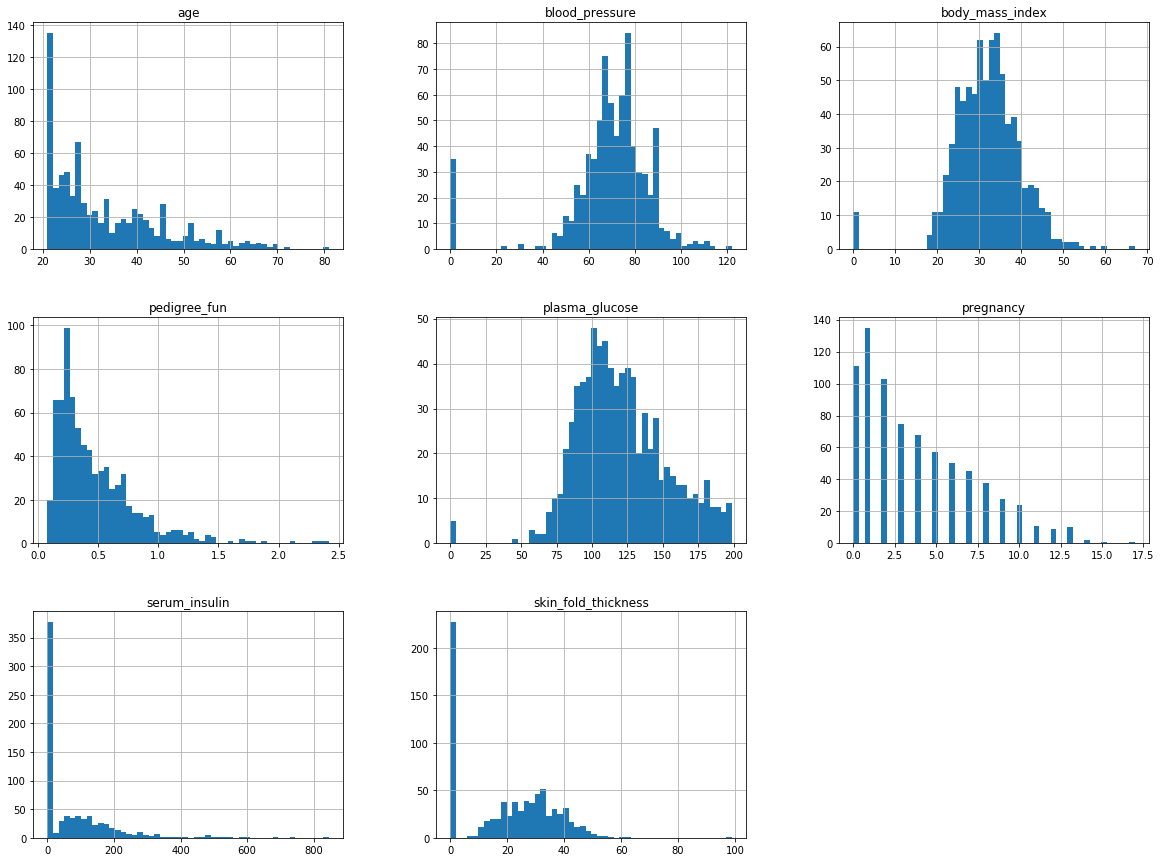

In [8]:
hist = df.hist(bins=50, figsize=(20,15))

#### blood_pressure, body_mass_index, plasma_glucose, serum_insulin and skin_fold_thickness have value of 0 as missing data. 
#### We will remove the rows with missing values

### Number of rows in df

In [9]:
len(df)

768

### Missing values removal

In [10]:
columns_list = ['blood_pressure', 'body_mass_index','plasma_glucose','serum_insulin','skin_fold_thickness']
df[columns_list] = df[columns_list].replace(0, np.nan)

df.head(5)

,pregnancy,plasma_glucose,blood_pressure,skin_fold_thickness,serum_insulin,body_mass_index,pedigree_fun,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
df = df.dropna()
df.head(5)

,pregnancy,plasma_glucose,blood_pressure,skin_fold_thickness,serum_insulin,body_mass_index,pedigree_fun,age,class
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


### Number of rows left and removed

In [12]:
print("Number of rows left: ", len(df))
print("Number of removed rows: ", 763 - len(df))

Number of rows left:  392
Number of removed rows:  371


### Histograms after removal of missing values

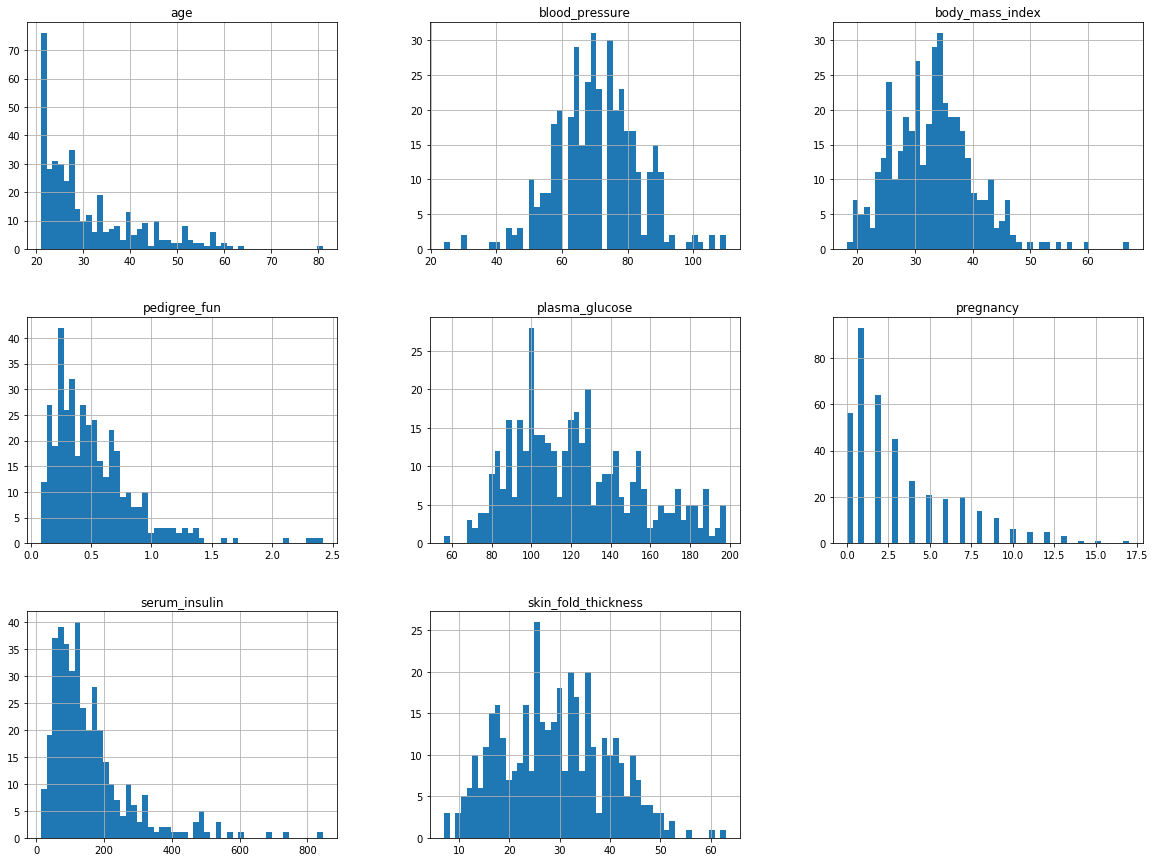

In [13]:
hist = df.hist(bins=50, figsize=(20,15))

### Data correlation

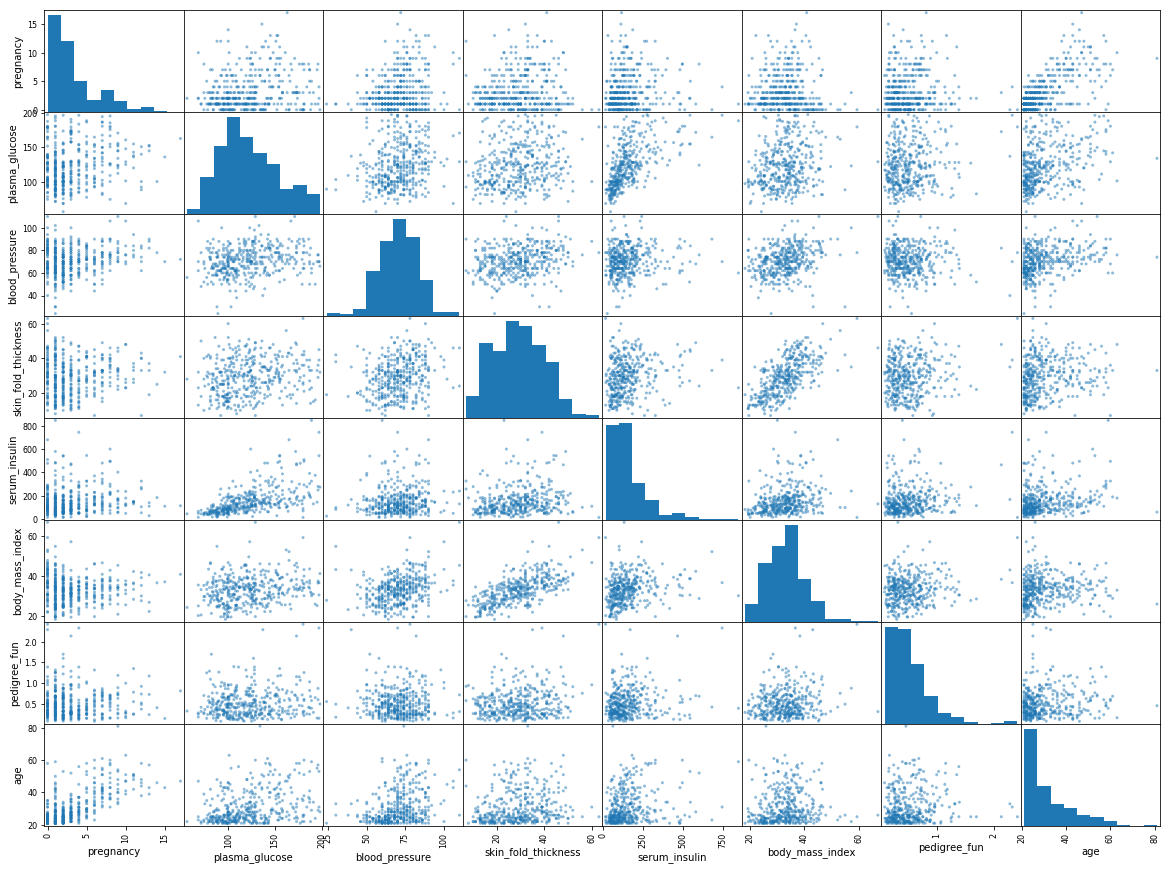

In [14]:
df_2 = df.drop(columns=['class']) # class columnn removed
scatter = pd.plotting.scatter_matrix(df_2, figsize=(20,15))

### Split of the data 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='class'), df[['class']], random_state=2)

### Checking dimensions

In [16]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (294, 8)
y_train shape: (294, 1)
X_test shape: (98, 8)
y_test shape: (98, 1)


### Random Forest Classifier

In [17]:
rfc = RandomForestClassifier()

In [18]:
rfc.fit(X_train,y_train)

C:\Users\suwcz\Miniconda3\envs\science\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Accuracy of the classifier

In [19]:
accuracy = rfc.score(X_test, y_test)
accuracy

0.7959183673469388